# 2D Cellular Automaton (Conway's Life Game) 

In [113]:
import PyPlot
import PyCall

In [139]:
const nx = 64
const nt = 1024

xxx = rand([0,0,0,1],(nx,nx));
xxt = zeros(Int8, (nt,nx,nx));

In [140]:
for i in 1:nt
    nnn = circshift(xxx,(-1,-1)) + circshift(xxx,(0,-1)) + circshift(xxx,(1,-1)) + circshift(xxx,(-1, 0)) + circshift(xxx,(1, 0)) + circshift(xxx,(-1, 1)) + circshift(xxx,(0, 1)) + circshift(xxx,(1, 1));
    xxx = Int.(xxx .== 0) .* Int.(nnn .== 3) + Int.(xxx .== 1) .* (Int.(nnn .== 2) + Int.(nnn .== 3))
    xxt[i,:,:] = xxx[:,:]
end

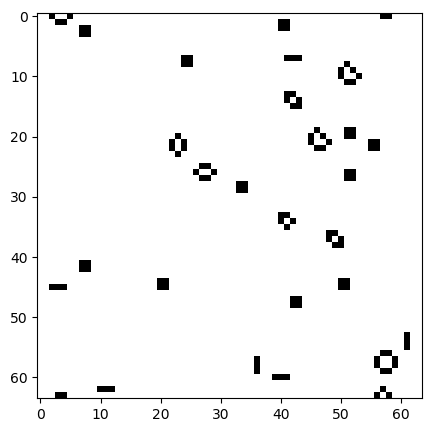

In [141]:
fig1 = PyPlot.figure("LifeGame",figsize=(5,5))
snap1 = []
for i in 1:nt
    img = PyPlot.imshow(1 .- xxt[i,:,:],cmap="gray");
    push!(snap1,[img])
end

In [142]:
animator = PyCall.pyimport("matplotlib.animation")
animation1 = animator[:ArtistAnimation](fig1, snap1, interval=1000/3)
animation1[:save]("lifegame1.gif", writer="imagemagick")

In [143]:
display("text/html", """<img src="lifegame1.gif">""")

In [148]:
import GR 
import Plots

┌ Info: Recompiling stale cache file /Users/nono/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [149]:
Plots.gr()

Plots.GRBackend()